# Pre-Processing

In [62]:
%pip install scikit-learn
%pip install category-encoders
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter

# Self-made Function

In [64]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [65]:
def cek_duplikat(df):
    dup = df.duplicated()
    print("Jumlah duplikasi data : " + str(dup.sum()))

In [66]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [67]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

# Read Dataset

In [68]:
df_final = pd.read_csv('dataset final/final_dataset.csv')

# Data Preprocessing


## Encoding Categorical

In [69]:
numerical_columns = df_final.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_final.select_dtypes(include=['object']).columns

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = df_final.copy()
le = LabelEncoder()

for col in categorical_columns:
  if col != 'Agent':
    df[col] = le.fit_transform(df[col])

Untuk kolom Agent, setiap value-nya akan diubah menjadi value numeric sesuai dengan yang ada di `agent_encode.csv`

In [71]:
agent_encode_df = pd.read_csv('dataset/agent_encode.csv')

In [72]:
df = pd.merge(df, agent_encode_df, on='Agent', how='left')
df.drop(columns=['Agent', 'Unnamed: 0'], inplace=True)
df.rename(columns={'Encode': 'AgentEncoded'}, inplace=True)
df = df.select_dtypes(include=['int64', 'float64'])

## Feature selection

In [73]:
X = df.drop('AgentEncoded', axis=1)
y = df['AgentEncoded']

Melihat distribusi label

In [74]:
# Melihat distribusi kelas pada dataset
counter_y = Counter(y)
counter_y

Counter({1: 16539,
         0: 15936,
         13: 10845,
         11: 9118,
         6: 9089,
         4: 8382,
         8: 6684,
         2: 5974,
         7: 5564,
         12: 5053,
         5: 4812,
         9: 4469,
         15: 2938,
         14: 1761,
         3: 786,
         10: 151,
         16: 149})

karena terdapat imbalance, maka perlu ditangani. Dalam hal ini kami coba gunakan `resampling`

Mengecek kembali distribusi label

In [75]:
counter_y = Counter(y)
counter_y

Counter({1: 16539,
         0: 15936,
         13: 10845,
         11: 9118,
         6: 9089,
         4: 8382,
         8: 6684,
         2: 5974,
         7: 5564,
         12: 5053,
         5: 4812,
         9: 4469,
         15: 2938,
         14: 1761,
         3: 786,
         10: 151,
         16: 149})

Mengecek korelasi setiap fitur terhadap label

In [76]:
df.corr()['AgentEncoded']

GameID              -0.221821
ACS                 -0.050276
Kills               -0.039397
Deaths               0.039237
Assists              0.053646
PlusMinus           -0.058441
ADR                 -0.058302
HS_Percent          -0.018986
FirstKills          -0.084458
FirstDeaths         -0.000111
FKFD_PlusMinus      -0.069006
Num_2Ks             -0.026402
Num_3Ks             -0.021743
Num_4Ks             -0.018076
Num_5Ks             -0.009079
OnevOne             -0.021817
OnevTwo             -0.019915
OnevThree           -0.005883
OnevFour            -0.005112
OnevFive            -0.002018
Econ                -0.082755
Plants               0.093230
Defuses             -0.023766
MatchID             -0.215912
Team1ID_x           -0.120366
Team2ID_x           -0.145477
Winner               0.000907
Team1_Eco           -0.004893
Team1_SemiEco        0.002629
Team1_SemiBuy        0.003512
Team1_FullBuy        0.002328
Team1_TotalRounds    0.000110
Team2_Eco           -0.008194
Team2_Semi

Mengecek Heatmap dari dataframe

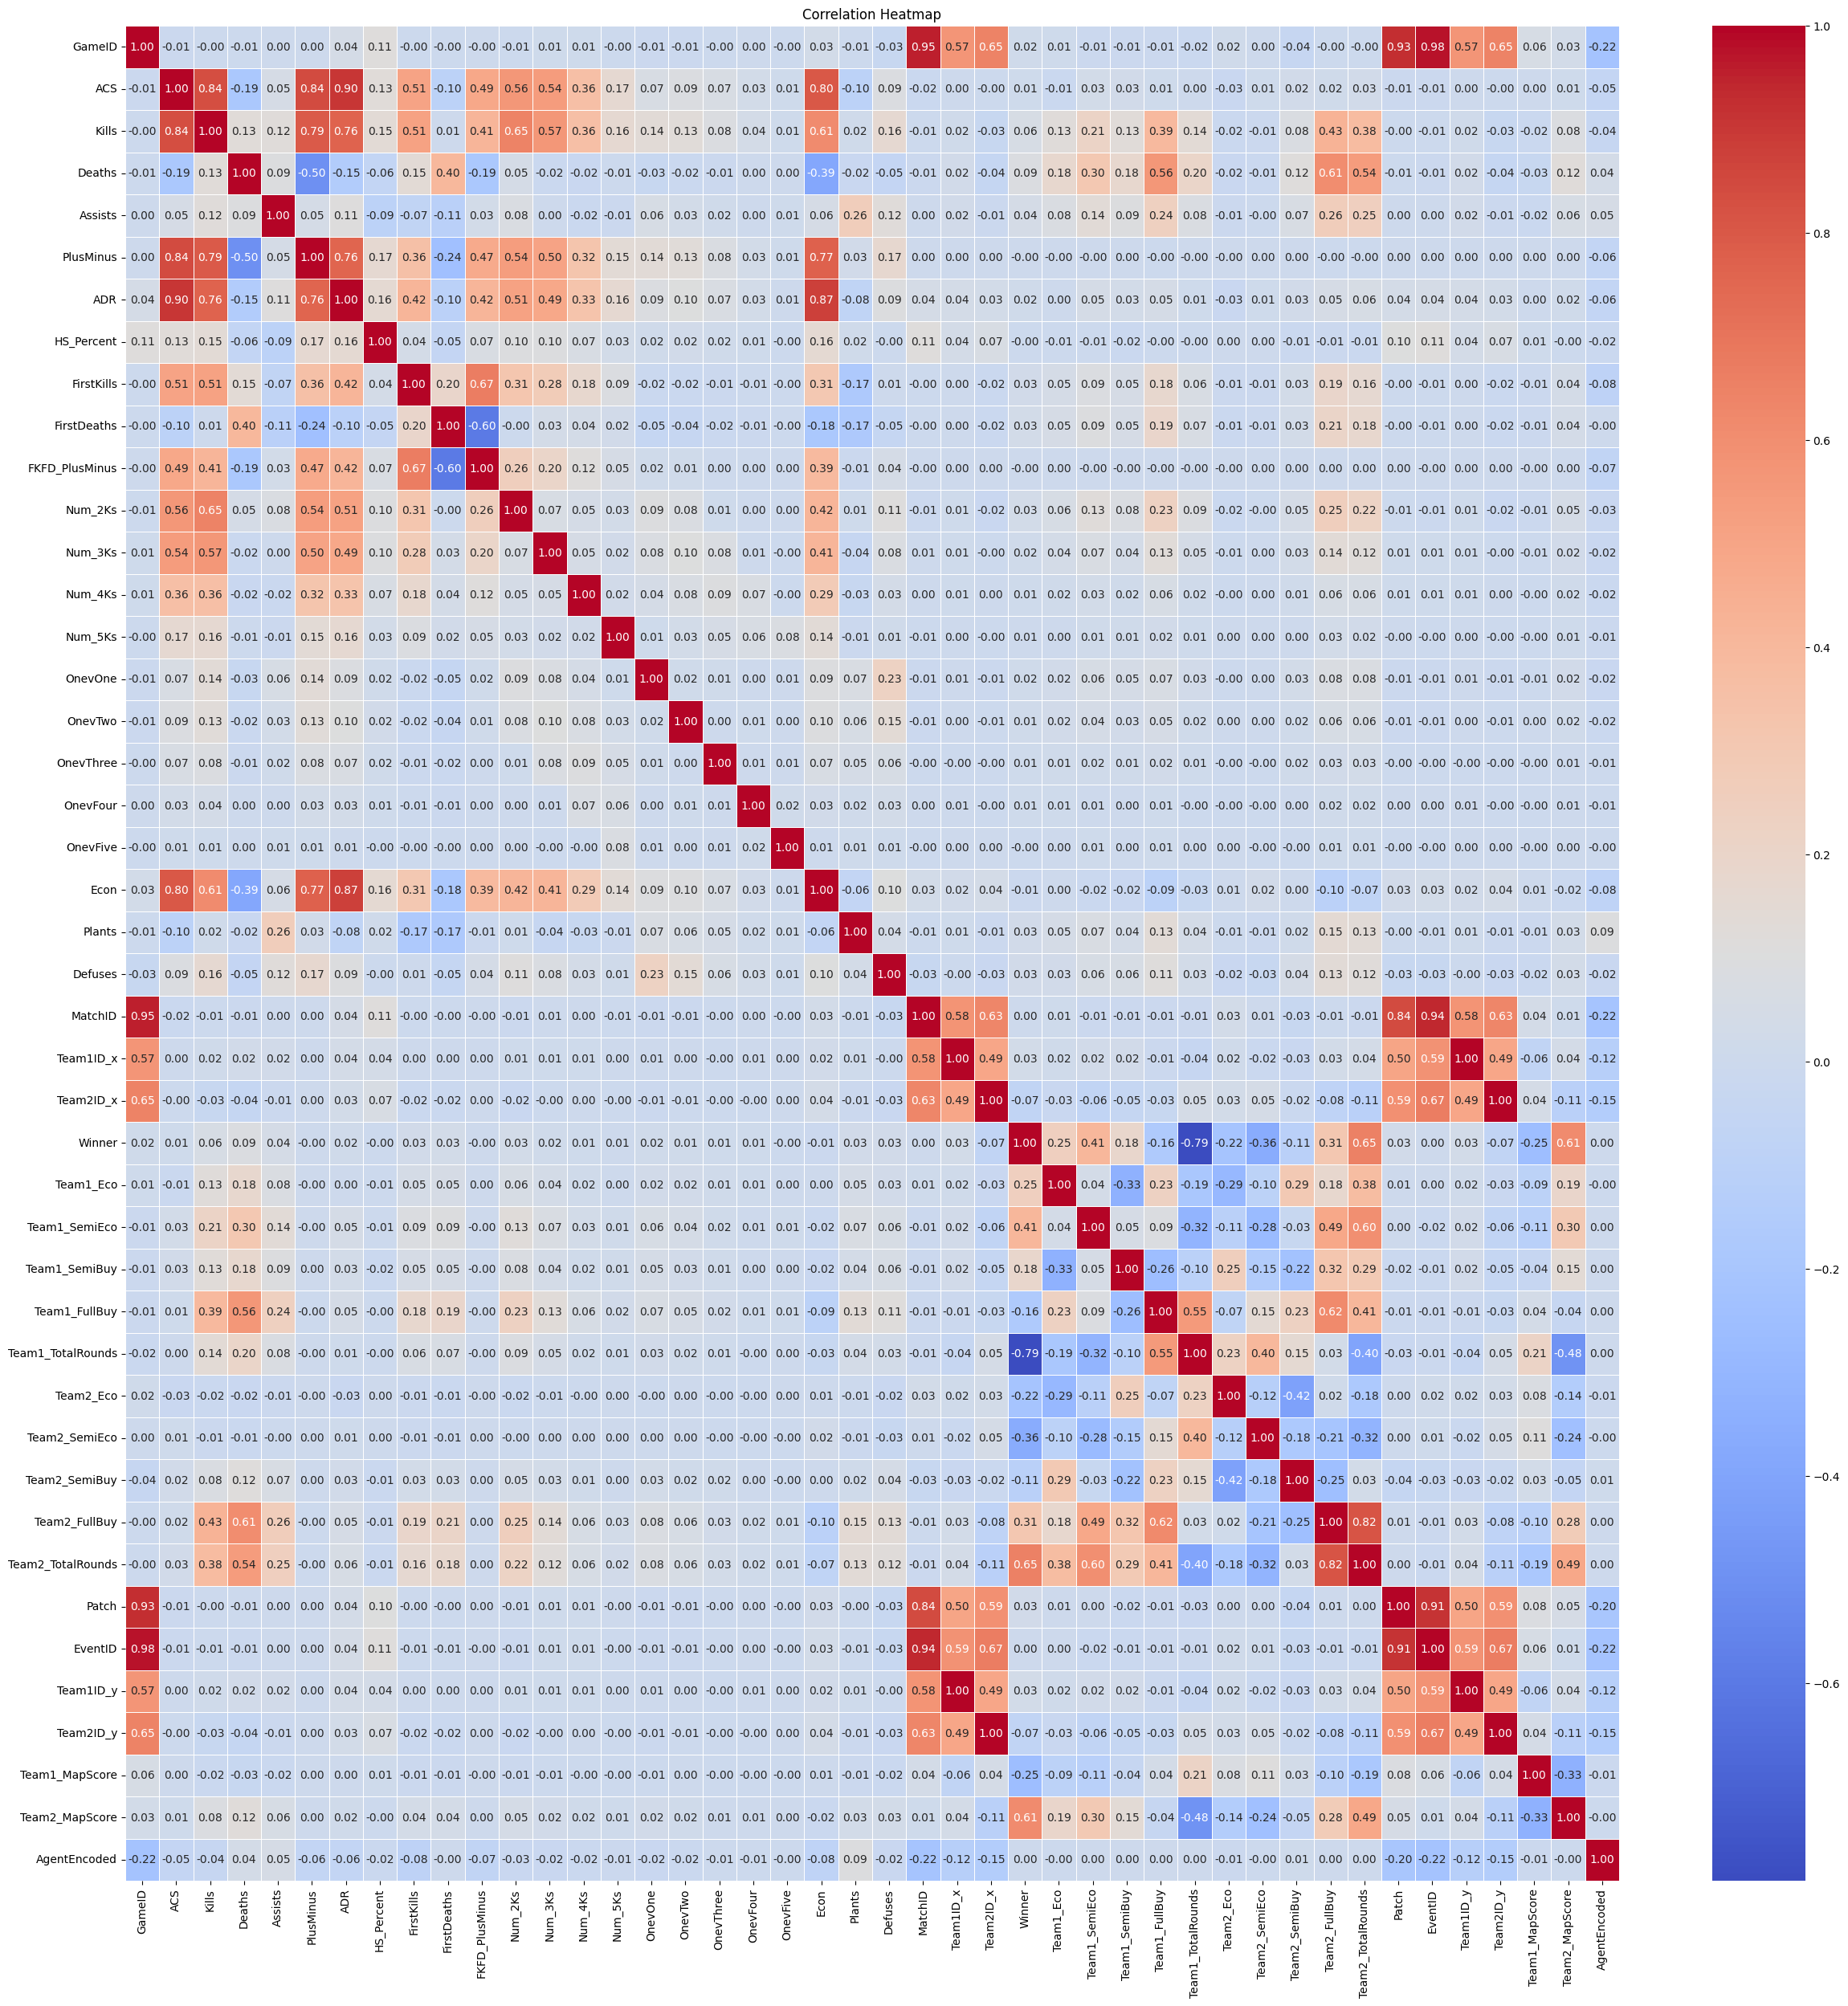

In [77]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [78]:
df.columns

Index(['GameID', 'ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR',
       'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks',
       'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree',
       'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses', 'MatchID',
       'Team1ID_x', 'Team2ID_x', 'Winner', 'Team1_Eco', 'Team1_SemiEco',
       'Team1_SemiBuy', 'Team1_FullBuy', 'Team1_TotalRounds', 'Team2_Eco',
       'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy', 'Team2_TotalRounds',
       'Patch', 'EventID', 'Team1ID_y', 'Team2ID_y', 'Team1_MapScore',
       'Team2_MapScore', 'AgentEncoded'],
      dtype='object')

Disini saya coba melakukan feature selection yang menurut saya dapat menentukan agent yang dipick oleh seseorang

`GameID`: Sebagai Identifier  
`MatchID`: Sebagai Identifier  
`EventID`: Sebagai Identifier  
`ACS`: Semakin tinggi, maka semakin sering terlibat dalam sebuah combat. Biasanya pemain di tingkat Pro Matches dengan role Duelist memiliki ACS yang tinggi.  
`Kills`: Fitur ini berkorelasi tinggi dengan ACS  
`Assists`: Fitur ini punya korelasi yang rendah, namun pemain dengan role Initiator dan Controller memiliki banyak ability untuk memperoleh skor ini.  
`FirstKills`: Player dengan role Duelist di Attacking Team memiliki kecenderungan untuk melakukan entry pada bomb site yang dijaga oleh Defending Team, meningkatkan chance untuk bertemu dengan musuh dan melakukan FirstKill.  
`FirstDeaths`: Merupakan kebalikan dari skenario FirstKills di mana kontak pertama dengan musuh pertama menghasilkan FirstDeath.  
`Plants`: Player dengan role Initiator dan Controller pada Attacking Team cenderung memiliki tugas untuk membawa bom ke site.  
``

In [79]:
feat_select = ['GameID', 'ACS', '']

In [85]:
df.head()

,GameID,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Patch,EventID,Team1ID_y,Team2ID_y,Team1_MapScore,Team2_MapScore,AgentEncoded
0,60894,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,0
1,60894,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,10
2,60894,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,1
3,60894,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,7
4,60894,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,5


In [86]:
df[df['GameID'] == 60894]

,GameID,ACS,Kills,Deaths,Assists,PlusMinus,ADR,HS_Percent,FirstKills,FirstDeaths,...,Team2_SemiBuy,Team2_FullBuy,Team2_TotalRounds,Patch,EventID,Team1ID_y,Team2ID_y,Team1_MapScore,Team2_MapScore,AgentEncoded
0,60894,313.0,24.0,10.0,3.0,14.0,195.0,31.0,4.0,4.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,0
1,60894,227.0,16.0,10.0,7.0,6.0,161.0,16.0,1.0,1.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,10
2,60894,226.0,17.0,9.0,8.0,8.0,148.0,27.0,3.0,0.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,1
3,60894,218.0,17.0,12.0,2.0,5.0,141.0,19.0,3.0,0.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,7
4,60894,80.0,5.0,13.0,3.0,-8.0,55.0,22.0,3.0,1.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,5
5,60894,229.0,15.0,16.0,5.0,-1.0,155.0,31.0,1.0,2.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,2
6,60894,203.0,12.0,14.0,6.0,-2.0,151.0,22.0,0.0,0.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,1
7,60894,173.0,12.0,16.0,2.0,-4.0,103.0,18.0,1.0,3.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,10
8,60894,125.0,9.0,15.0,1.0,-6.0,94.0,36.0,1.0,3.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,5
9,60894,89.0,6.0,18.0,3.0,-12.0,57.0,22.0,3.0,6.0,...,4.0,10.0,7,3.0,826,6903,6020,2,1,7


In [80]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# selector = SelectKBest(f_classif, k=10)
# X = selector.fit_transform(X, y)
# input_features = selector.feature_names_in_
# selector.get_feature_names_out(input_features=input_features)

## Standarization

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# from sklearn.model_selection import train_test_split, KFold, cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, stratify=y,random_state = 123)

# RandomForestClassfier

In [83]:
# from sklearn.ensemble import RandomForestClassifier

# rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
# rf_classifier.fit(X_train, y_train)

# # Model Evaluation
# y_pred = rf_classifier.predict(X_test)
# print(classification_report(y_test, y_pred))
# evaluate_classifier_performance(y_test, y_pred)

# RandomForestClassifier with CV

In [84]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

# rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
# for i in range(len(scoring)):
#   score = cross_val_score(rf_classifier, X_pca, y, scoring=scoring[i], cv=cv, n_jobs=-1)
#   print(f"{scoring[i]} score: {np.mean(score)}")